In [74]:
import ThinFilmDataCreation as tfdc
import numpy as np
import matplotlib.pyplot as plt

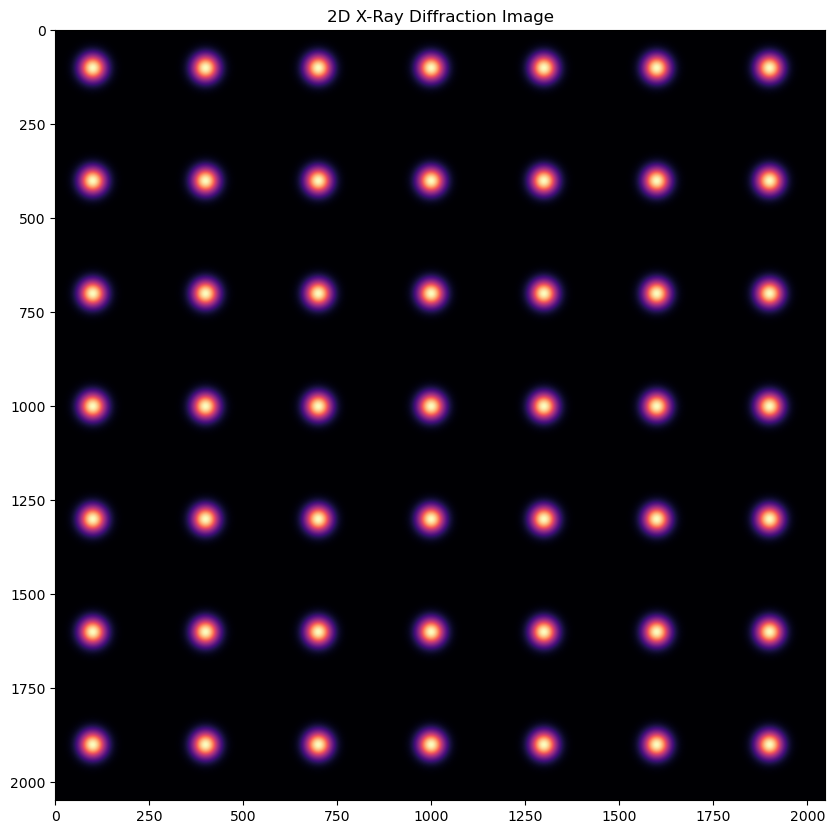

In [77]:
#Creating spot image
spots = tfdc.create_anisotropic(10, 25, 300, size = 200, cmap = 'magma')
spots = spots*7

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
ZnO


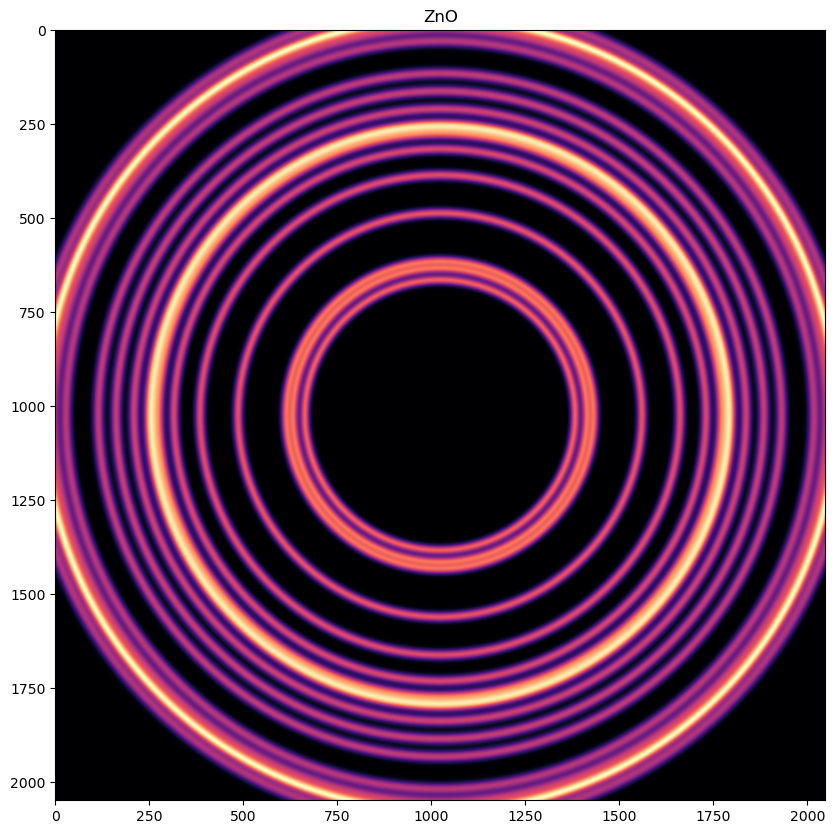

In [78]:
#Creating the thin-film diffraction pattern from a calibrant material, selecting "18" Ni as the calibrant
pattern = tfdc.create_isotropic(.4, .5e-10, cmap = "magma" )
pattern = pattern

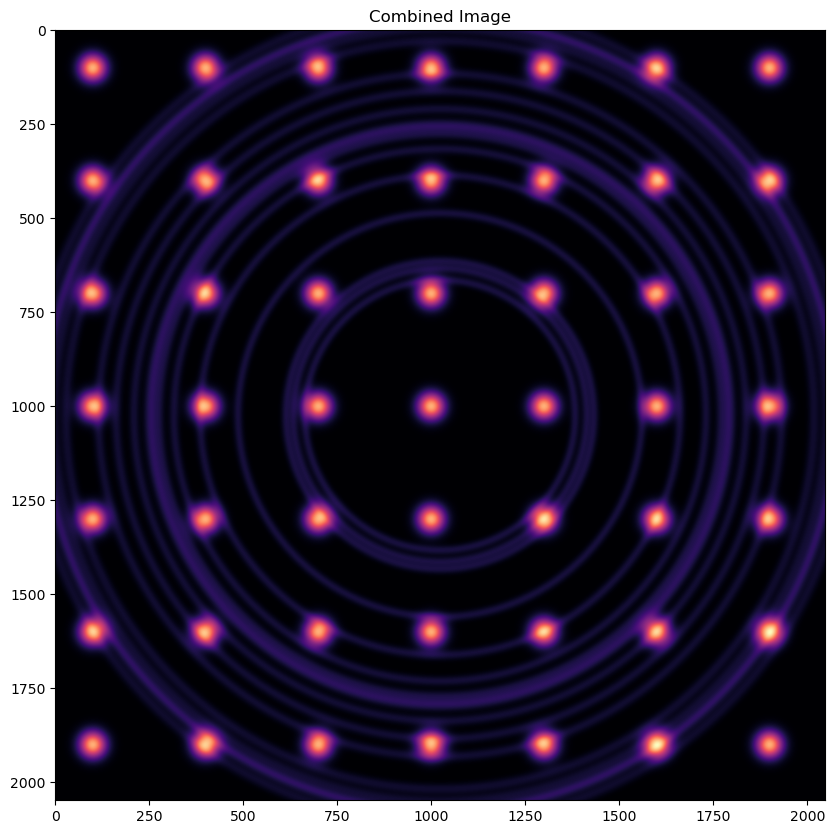

In [79]:
#Combining the images of the thin-film signal and the single-crystal signal
thin_film = tfdc.combine_image(pattern, spots, cmap = "magma")
#os.chdir(r'C:/Users/dalverson/Downloads')
#plt.figure(figsize = (10,10))
#plt.imshow(thin_film, cmap = "magma")
#plt.savefig("thin_film.png", dpi = 500)

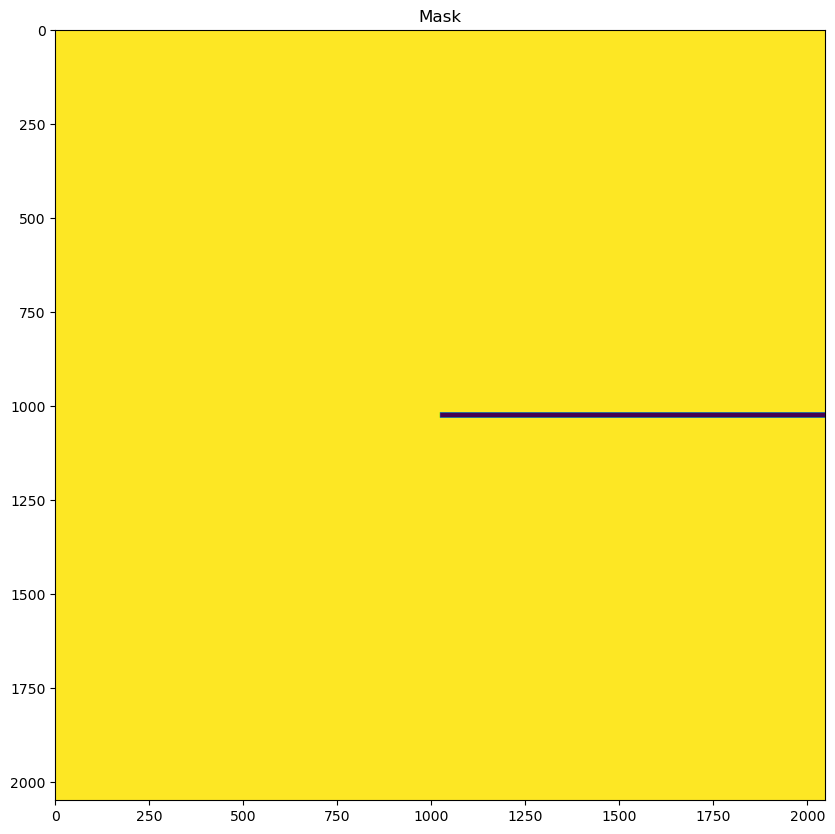

In [6]:
mask_data = tfdc.create_mask(thin_film, 7)
#data = tfdc.rotate_and_integrate(thin_film, 1, 0.3, .5e-10, resolution = 3000, mask = mask_data)

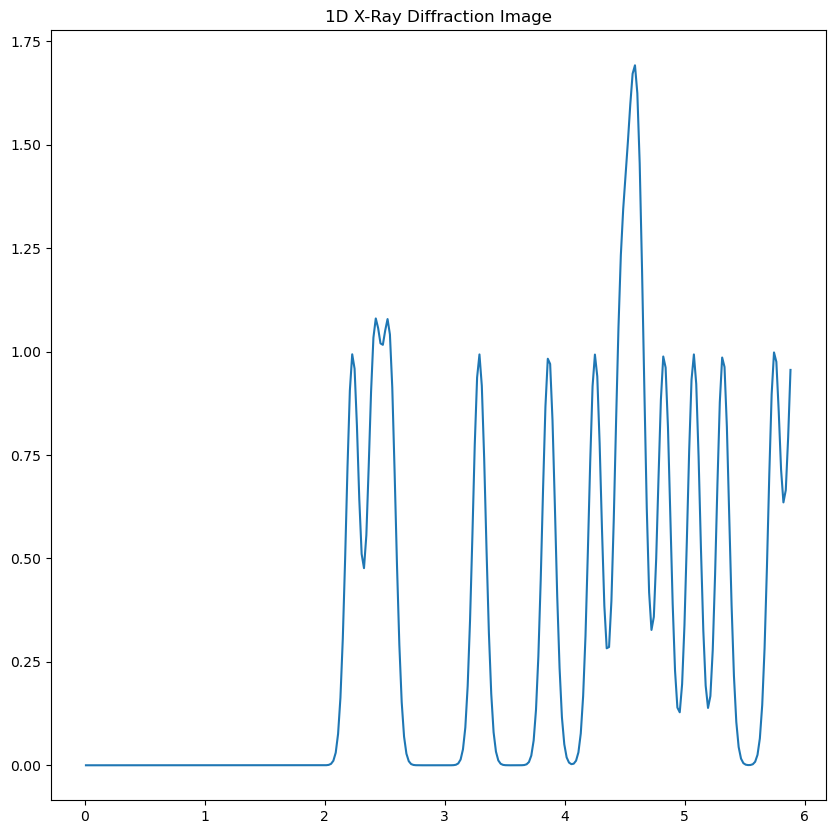

In [97]:
z, one_line = tfdc.integrate_image(pattern, .4, .5e-10, resolution = 300, mask = mask_data, show = True)

In [46]:
from PIL import Image
import pyFAI
import pyFAI.calibrant
import numpy as np
import matplotlib.pyplot as plt
from pyFAI.gui import jupyter
import scipy.ndimage as ndimage
import pyFAI.detectors
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator

def image_rotation(image, angle, show = False):
    """
    This function rotates the combined image by a user specified angle amount, if the angle specified is 1, the result is that the combined image is rotated by one degree.
    
    Parameters:
        image (2D array): The image of the combined spots and calibration.
        angle_of_rotation (int): The angle of rotation.
        """
    pil_format = Image.fromarray(image)
    rotated_image = pil_format.rotate(angle)
    rotated_image = np.array(rotated_image)
    
    if show == True:
        #display the rotated image
        plt.figure(figsize=(10, 10))
        plt.imshow(rotated_image, cmap='viridis')
        plt.title("Rotated Image")
        plt.show()
    return rotated_image
        
def rotate_and_integrate(combined_image, angle_of_rotation, distance, wavelength, resolution = 3000, mask = None):
    """
    This function takes the combined image, the mask, the distance, the wavelength, and the resolution of integration, and rotates the combined image by a user specified angle amount, if the angle specified is 1, the result will be 360 integrations of the combined image, each integration will be rotated by 1 degree.
    
    Parameters:
        combined_image (2D array): The image of the combined spots and calibration.
        angle_of_rotation (int): The angle of rotation.
        distance (float): The distance from the detector to the sample.
        wavelength (float): The wavelength of the x-rays.
        resolution (int): The resolution of the integration.
        mask (2D array): The mask to use for the integration.
    """
    
    import pandas as pd 
    
    #create a dataframe to store the 1D integrations
    df = pd.DataFrame()
    
    #create a loop that rotates the combined image by the user specified angle amount and integrates the image
    for i in range(0, 360, angle_of_rotation):
        #rotate the mask for the combined image
        rotated_image = image_rotation(combined_image, i);
        #print(rotated_image)
        
        #integrate the rotated image
        q, I = tfdc.integrate_image(rotated_image, distance, wavelength, resolution, mask, show = False);
        
        #add the 1D integration to the dataframe
        df[i] = I
        
        #create a waterfall plot of the 1D integrations, where each dataset is moved up on the y axis by a multiple of .5
    plt.figure(figsize=(10, 10))
    for j in range(0, 360, angle_of_rotation):
            plt.plot(q, (df[j]+ j*.01), alpha = .55, c = 'black')
    plt.xlabel('q A $^(-1)$')
    plt.ylabel('Intensity')
    plt.title("Waterfall Plot of Rotated 1D X-Ray Diffraction Images")
    plt.show()        
    return q, df

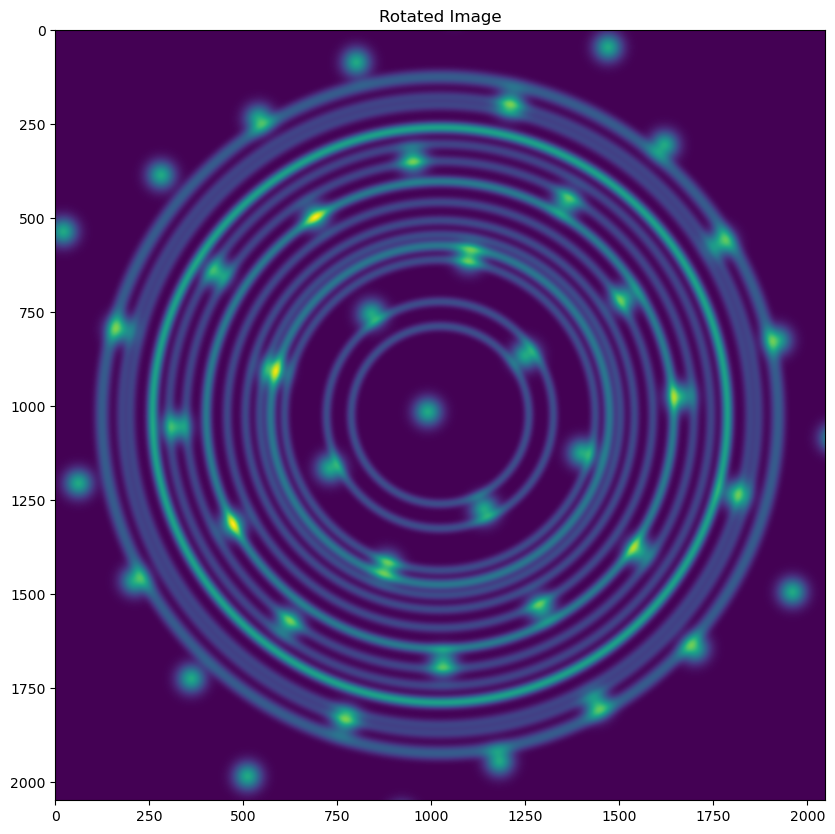

In [47]:
r = image_rotation(thin_film, 30, show=True)

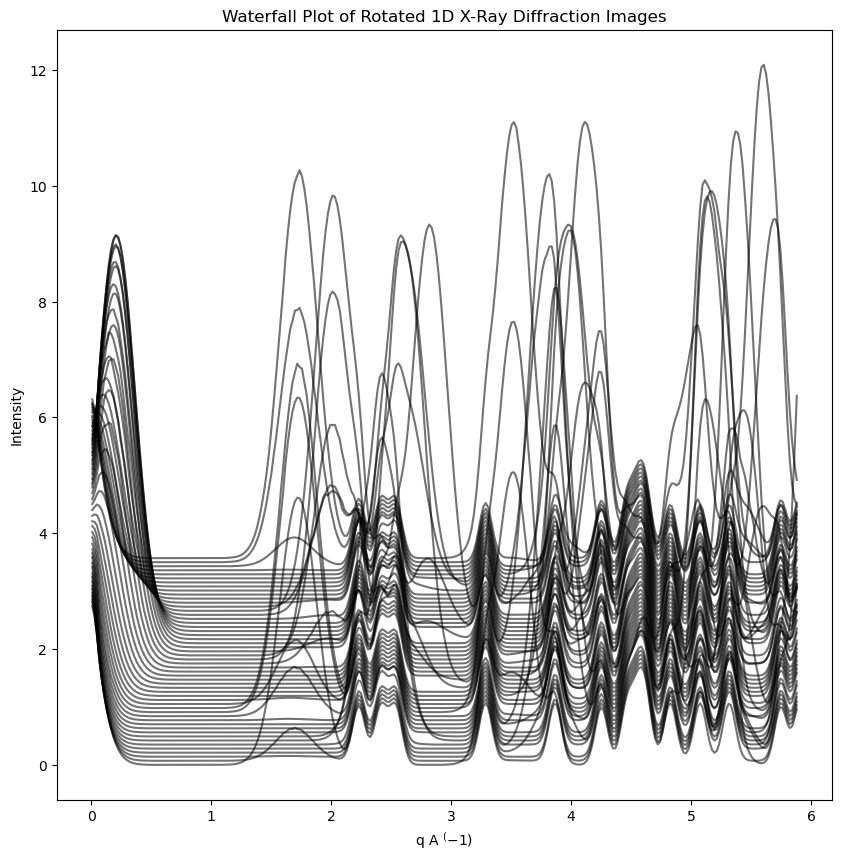

In [81]:
q, data = rotate_and_integrate(thin_film, 7,.4, .5e-10, resolution = 300, mask = mask_data)

In [49]:
#delete all negative values in the data dataframe from all columns

for i in range(len(data.columns)):
    data[data.columns[i]] = data[data.columns[i]].clip(lower = 0)
data

0             7             14        21        28        35   \
0    1.997784e+00  1.997784e+00  1.997784e+00  1.977426  1.968217  1.968342   
1    1.917937e+00  1.917937e+00  1.881263e+00  1.878390  1.865927  1.860649   
2    1.826946e+00  1.801687e+00  1.782688e+00  1.753996  1.741969  1.740451   
3    1.721656e+00  1.675774e+00  1.657255e+00  1.627697  1.607983  1.594582   
4    1.518374e+00  1.460753e+00  1.432882e+00  1.390105  1.370308  1.351560   
..            ...           ...           ...       ...       ...       ...   
495  4.918053e-23  4.975621e-23  5.095001e-23  0.000397  0.001376  1.225014   
496  4.860183e-24  4.576687e-24  5.454892e-24  0.000274  0.001685  1.402109   
497  4.644054e-25  4.696080e-25  5.164115e-25  0.000187  0.002016  1.589849   
498  3.679921e-26  3.873540e-26  3.721726e-26  0.000125  0.002344  1.782380   
499  3.445376e-27  3.287471e-27  3.816662e-27  0.000085  0.002721  1.981139   

              42            49        56            63   ...           294  \
0    1.968342e+00  1.968339e+00  1.968339  1.968208e+00  ...  2.104836e+00   
1    1.857767e+00  1.858180e+00  1.860681  1.861528e+00  ...  2.140689e+00   
2    1.727814e+00  1.733175e+00  1.735312  1.745269e+00  ...  2.178866e+00   
3    1.585642e+00  1.588896e+00  1.600629  1.606561e+00  ...  2.223268e+00   
4    1.346264e+00  1.344533e+00  1.352215  1.374788e+00  ...  2.285009e+00   
..            ...           ...       ...           ...  ...           ...   
495  4.929369e-23  5.060866e-23  2.208221  4.860429e-23  ...  5.128649e-23   
496  5.101494e-24  5.096082e-24  2.523194  5.212991e-24  ...  5.001604e-24   
497  4.684012e-25  5.010918e-25  2.865170  4.690197e-25  ...  4.854485e-25   
498  3.893266e-26  4.011379e-26  3.226135  3.982810e-26  ...  4.042875e-26   
499  3.520934e-27  2.008871e-07  3.587906  3.435020e-27  ...  3.685431e-27   

          301           308           315       322       329       336  \
0    2.104746  2.084585e+00  2.047504e+00  2.047504  2.027140  2.027228   
1    2.108686  2.091661e+00  2.058502e+00  2.037687  2.015618  1.988868   
2    2.141960  2.108353e+00  2.058254e+00  2.015287  1.981141  1.944603   
3    2.166420  2.108819e+00  2.050357e+00  1.997553  1.939037  1.885345   
4    2.191767  2.094594e+00  2.000902e+00  1.915322  1.823527  1.746739   
..        ...           ...           ...       ...       ...       ...   
495  0.056833  5.067666e-23  4.715108e-23  0.055153  0.001044  0.002074   
496  0.075440  5.038246e-24  5.064370e-24  0.069652  0.001538  0.001511   
497  0.099275  4.731413e-25  4.645020e-25  0.086922  0.002238  0.001099   
498  0.130972  3.816985e-26  3.714394e-26  0.108619  0.003006  0.000778   
499  0.169329  3.625200e-27  3.644862e-27  0.132267  0.003988  0.000559   

          343           350           357  
0    2.006991  1.997784e+00  1.997784e+00  
1    1.974740  1.929522e+00  1.917937e+00  
2    1.900292  1.875378e+00  1.826946e+00  
3    1.836414  1.784415e+00  1.721656e+00  
4    1.671130  1.598875e+00  1.520308e+00  
..        ...           ...           ...  
495  0.004454  4.895337e-23  5.056204e-23  
496  0.003249  5.326780e-24  4.962155e-24  
497  0.002337  4.873622e-25  4.746509e-25  
498  0.001158  4.008200e-26  3.863469e-26  
499  0.000168  3.651727e-27  3.427977e-27  

[500 rows x 52 columns]

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import glob as glob
from tifffile import imread, imshow
import warnings
import os
import dask


def attempt(Real_Data, Length, i, init= None, solver = 'cd', beta_loss = 'frobenius', iter = 500):
    # Create an NMF model with specified parameters
    NMF_model = NMF(n_components=i, init = init, solver = solver, beta_loss = beta_loss, max_iter = iter)
    
    # Fit the NMF model to the input data
    NMF_data= NMF_model.fit_transform(Real_Data)
    
    # Extract the factorized matrix components
    fit_compos = NMF_model.components_
    
    # Calculate the reconstruction error of the model
    Q = np.array(NMF_model.reconstruction_err_)*100
    
    # Suppress warnings from the library
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    # Return the reconstruction error, factorized matrix components, and transformed data
    return Q

def attempt2(Real_Data, Length, i, init= None, solver = 'cd', beta_loss = 'frobenius', iter = 500):
    # Create an NMF model with specified parameters
    NMF_model = NMF(n_components=i, init = init, solver = solver, beta_loss = beta_loss, max_iter = iter)
    
    # Fit the NMF model to the input data
    NMF_data= NMF_model.fit_transform(Real_Data)
    
    # Extract the factorized matrix components
    fit_compos = NMF_model.components_
    
    # Calculate the reconstruction error of the model
    Q = np.array(NMF_model.reconstruction_err_)*100
    
    # Suppress warnings from the library
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    # Return the reconstruction error, factorized matrix components, and transformed data
    return Q, fit_compos, NMF_data



def Run_NMF(Real_Data, init= None, solver = 'cd', beta_loss = 'frobenius', itear = 1000):
    """ 
    This function performs NMF (Non-negative Matrix Factorization) on the input data, Real_Data.
    The function takes in the following parameters:
    Real_Data: the input data to be factorized
    init: the initial guess of the factorization (default is None)
    solver: the solver to be used in the factorization (default is 'cd' - Coordinate Descent)
    beta_loss: the beta-divergence loss function to be used (default is 'frobenius')
    itear: the number of iterations to perform in the factorization (default is 1000)

    The function returns a tuple of two items:
        1. A pandas dataframe of the NMF components
        2. The reconstructed NMF data
        
    The function uses Dask for parallel computing, and opens a web browser to display the Dask dashboard. 
    """
    import dask.delayed
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    from dask.distributed import Client
    client = Client()
    import webbrowser
    webbrowser.open(client.dashboard_link)

    # Initialize variables
    In = init
    Solve = solver
    Beta = beta_loss
    It = itear

    # Delayed computation of the function attempt for each number of components
    jobs = [dask.delayed(attempt)(Real_Data, Real_Data.shape[1], i, In, Solve, Beta, It) for i in range(1, Real_Data.shape[1])]
    calcs = dask.compute(jobs)[0]

    # Convert the results to a numpy array
    calcs_new = np.array(calcs)

    # Find the minimum beta-divergence between the training data and the reconstructed data
    min_Q = np.min(calcs_new)
    noc = np.where(calcs_new == min_Q)
    noc_2 = noc[0]
    number_of_components = noc_2[0] + 1

    # Run the final NMF with the number of components found
    Divergence, compos, NMF_Data_2 = attempt2(Real_Data, Real_Data.shape[1], number_of_components, In, Solve, Beta)

    # Print the beta-divergence and number of components used
    print('The beta-divergence between the training data and reconstructed data is',
            Divergence,'%', 'The final number of components used were', number_of_components + 1)

    # Create a pandas dataframe of the NMF components
    components_dataframe = pd.DataFrame(compos)
    #components_dataframe = components_dataframe.T

    # Plot the NMF components
    plt.figure(figsize=(10, 10))
    plt.plot(components_dataframe, linewidth=2, alpha=0.7, c='k')
    plt.title('NMF Components')
    plt.ylabel('Intensity')
    plt.xlabel('Q')

    return components_dataframe, NMF_Data_2

def AggCluster(Number_Clusters, data):
    
    """
    A program that will take in the type of scikitlearn clustering algorithm
    desired and the number of clusters as well as the data in a numpy array
    and output the associated clusters with the original data. This will make
    the 'latent' space from the clustering algorithms have more meaning
    
    Input:
    Number_Clusters - int, the number of clusters desired
    data - numpy array, the data to be used for clustering
    
    Output:
    Understanding_data - dictionary, contains the cluster number and the associated
                        int_angle value
    """
    
    # Import the AgglomerativeClustering function from the scikit-learn library
    from sklearn.cluster import AgglomerativeClustering
    
    # Create an AgglomerativeClustering object with the desired number of clusters
    Make_Clusters = AgglomerativeClustering(n_clusters=Number_Clusters, compute_distances=True)
    
    # Fit the model to the data and predict the cluster labels
    y_kmeans = Make_Clusters.fit_predict(data)
    
    # Fit the model to the data
    information = Make_Clusters.fit(data)
    
    # Get the distances parameter
    parameter = information.distances_

    # Initialize the variables for looping
    x = 0
    Understanding_data = {"Cluster_Number":[], "Int_Angle":[]};
    
    # Loop through each data point and add the cluster number and int_angle value to the dictionary
    while x < len(data.columns):
        Understanding_data["Cluster_Number"].append(y_kmeans[x])
        Understanding_data["Int_Angle"].append(data[x])
        x = x+1
        
    # Loop through each cluster and create a separate plot for each cluster
    q = 0
    while q < Number_Clusters:
        z = 0
        plt.figure()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agglomerative Clustering' + ' ' + str(q))

        # Loop through each data point and plot only the points belonging to the current cluster
        while z < len(data.columns):
            if Understanding_data["Cluster_Number"][z] == q:
                plt.plot(Understanding_data["Int_Angle"][z], label='Component' + str(z))
                
            z = z + 1
        q = q + 1
        
    # Return the dictionary of cluster numbers and int_angle values
    
    return Understanding_data

def Combine_Cluster(Understanding_data):
    """
        A program that will take in a user specified cluster or clusters of choice, from the Agglomerative 
        cluster function and average the signals for one array of data. This data will then be
        smoothed in a different function called smooth_data.
        
        Input: 
        Understanding_data - dictionary, contains the cluster number and the associated
        
        Output:
        Identified_signal - averaged numpy array, the averaged signal from the cluster of interest
    """
    cluster_of_interest = []
    keep_going = True
    cluster_numbers = np.array(Understanding_data['Cluster_Number'])
    
    while keep_going == True:
        print('Please enter the cluster number of interest')
        for i in range(0, len(cluster_numbers)):
            print('Cluster ', i+1)
        selected_cluster = int(input("Enter the cluster number of interest: ")) - 1
        cluster = np.where(cluster_numbers == selected_cluster)
        cluster_data = cluster[0]
        cluster_of_interest.append(cluster_data)
        keep_going = bool(input("Would you like to add another cluster? (True/False)"))
    
    arrayed_cluster = np.array(cluster_of_interest)
    Identified_signal = np.mean(arrayed_cluster, axis = 0)
    
    plt.figure(figsize = (10,10))
    plt.plot(Identified_signal)
    plt.x_label('Q')
    plt.ylabel('Intensity')
    plt.title('Averaged Signal')
    
    return Identified_signal

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import csv
import dask
import glob as glob
from tifffile import imread, imshow
import warnings
#import Open_Files
import os
#import Color_palette
import dask

def attempt(Real_Data, Length, i, init= None, solver = 'cd', beta_loss = 'frobenius', iter = 500):
    NMF_model = NMF(n_components=i, init = init, solver = solver, beta_loss = beta_loss, max_iter = iter)
    NMF_data= NMF_model.fit_transform(Real_Data)
    fit_compos = NMF_model.components_
    Q = np.array(NMF_model.reconstruction_err_)*100
    warnings.filterwarnings("ignore", category=FutureWarning)
    return Q

def attempt2(Real_Data, Length, i, init= None, solver = 'cd', beta_loss = 'frobenius', iter = 500):
    NMF_model = NMF(n_components=i, init = init, solver = solver, beta_loss = beta_loss, max_iter = iter)
    NMF_data= NMF_model.fit_transform(Real_Data)
    fit_compos = NMF_model.components_
    Q = np.array(NMF_model.reconstruction_err_)*100
    warnings.filterwarnings("ignore", category=FutureWarning)
    return Q, fit_compos, NMF_data


def Run_NMF(Real_Data, init= None, solver = 'cd', beta_loss = 'frobenius', itear = 1000):
    
    """" Comparison of multiple components without manually comparing
    multiple components all at once. There are a few ways that this can be done. One way
    is to take the residuals of the datasets with themselves to see which is the closests to the 
    "correct" component. This may only be done on sample data potentially. Could include a 
    simulated dataset of what the standing component should look like give or take some 
    variations in the data. When the residuals are taken if it is less than some given 
    percentage the would be the dataset/NMF component to use further. There may be multiple
    thus having to go in manually to find differences. 
    
    To do this, will need to import the simulated XRD pattern from VESTA and then take the residual differences
    of each component and compared to the simulated pattern. Will have the program spit out the compnents that
    meet the cutoff. """

    In = init
    Solve = solver
    Beta = beta_loss
    It = itear
    
    from dask.distributed import Client
    client = Client()
    import webbrowser
    webbrowser.open(client.dashboard_link)
    

    jobs = [dask.delayed(attempt)(Real_Data, Real_Data.shape[1], i, In, Solve, Beta, It) for i in range(1, Real_Data.shape[1])]
    #jobs = [dask.delayed(attempt)(Real_Data, Real_Data.shape[1], i, In, Solve, Beta, It) for i in range(1,20)]
    calcs = dask.compute(jobs)[0]
    print(calcs)

    calcs = np.array(calcs)
    min_Q = np.min(calcs)
    noc = np.where(calcs == min_Q)
    noc_2 = noc[0]
    number_of_components = noc_2[0] +1

    Divergence, compos, NMF_Data_2 = attempt2(Real_Data, Real_Data.shape[1], number_of_components, In, Solve, Beta)
            
    
    print('The beta-divergence between the training data and reconstructed data is',
             Divergence,'%' 'The final number of components used were',number_of_components+1)
    
    
    m = pd.DataFrame(compos)
    m = m.T
    
    plt.figure(figsize = (14,7))
    plt.plot(NMF_Data_2)
    
    return m,NMF_Data_2

c:\Users\dalverson\Anaconda3\envs\dask_working\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 49863 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:49864
INFO:distributed.scheduler:  dashboard at:           127.0.0.1:49863
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:49868'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:49869'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:49870'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:49867'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:49887', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:49887
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49891
INFO:distr

[13133.561195939965, 11155.775550135455, 9716.545167908189, 8439.023299992274, 7124.383196986249, 5971.70411189302, 4956.808813468727, 4467.48916872288, 3860.719654416777, 3288.414796676356, 3025.459897730168, 1996.0823599234718, 1612.070236304034, 1310.9235324047318, 930.7594594666866, 833.1450236862512, 662.1360210807123, 473.98838940013377, 433.5306647519567, 213.08947314607974, 247.68947053597591, 183.2831559728463, 158.98101578146446, 130.79156285760135, 118.38670673106606, 134.08860137023407, 120.81720584361939, 98.37070802780285, 82.62306715512318, 85.4093657063803, 106.71811484822258, 138.502497860525, 123.17996623218865, 108.50596550393907, 72.6737544805655, 84.77612970893702, 109.06234194681252, 87.34794415553199, 86.02659635362492, 100.20342044855173, 92.35804026063082, 50.4119591314811, 61.19859952072212, 66.64142031267711, 81.70211885335762, 45.3550172158588, 56.85450719179484, 66.95345323230671, 28.838411837375084, 54.052872213930506, 51.39758584887849]
The beta-divergenc

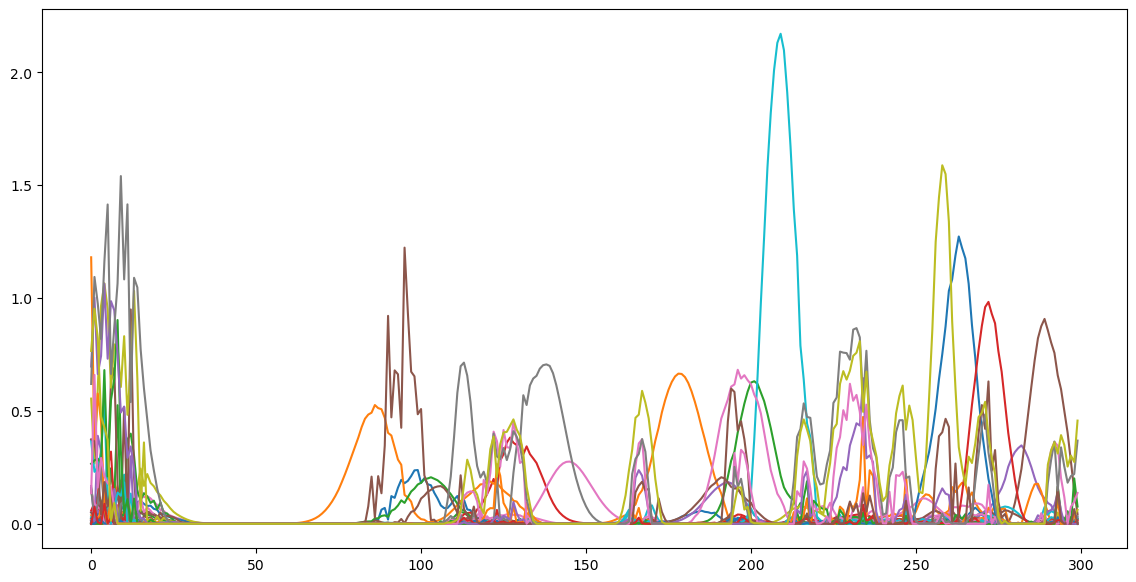

INFO:distributed.utils_perf:full garbage collection released 175.23 MiB from 41325 reference cycles (threshold: 9.54 MiB)


In [82]:
weights, components = Run_NMF(data)

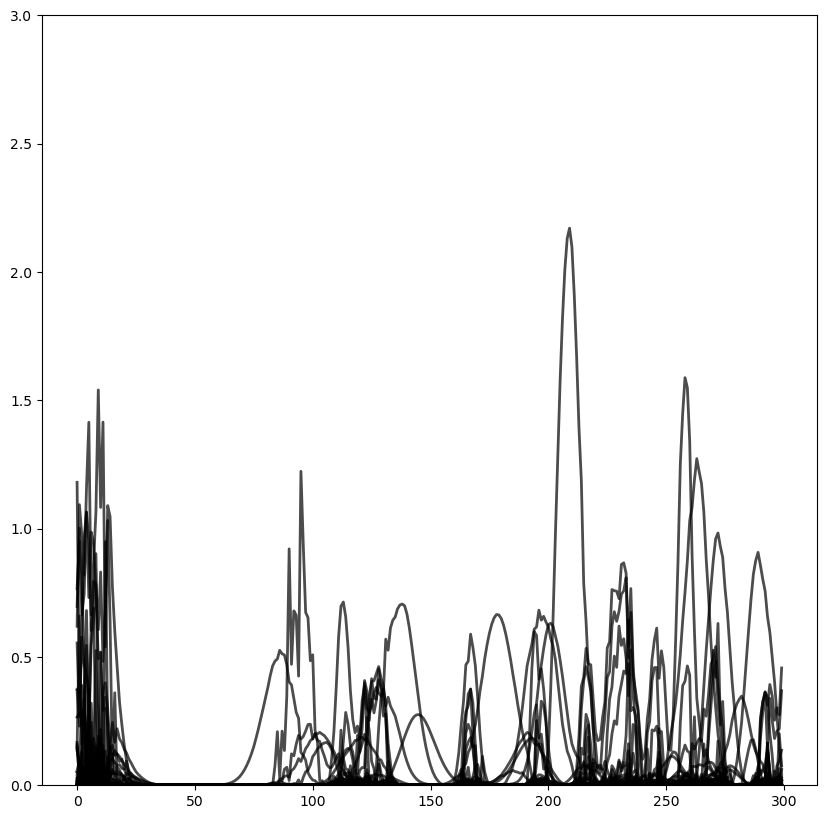

In [83]:
my_nmf_compos = pd.DataFrame(components, index = data.index)

plt.figure(figsize=(10, 10))
plt.ylim(0, 3)
plt.plot(my_nmf_compos, c = 'k', linewidth = 2, alpha = 0.7);

In [53]:
def AggCluster(Number_Clusters, data):
    
    """A program that will take in the type of scikitlearn clustering algorithm
        desired and the number of clusters as well as the data in a numpy array
        and output the associated clusters with the original data. This will make
        the 'latent' space from the clustering algorithms have more meaning"""

    from sklearn.cluster import AgglomerativeClustering
    Make_Clusters= AgglomerativeClustering(n_clusters = Number_Clusters, compute_distances=True)
    y_kmeans = Make_Clusters.fit_predict(data)
    information = Make_Clusters.fit(data)
    parameter = information.distances_

    x = 0
    Understanding_data = {"Cluster_Number":[], "Int_Angle":[]};
    while x < len(data):
        Understanding_data["Cluster_Number"].append(y_kmeans[x])
        Understanding_data["Int_Angle"].append(data[x])
        x = x+1
        
    q = 0
    while q < Number_Clusters:
        z = 0
        plt.figure()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Agglomerative Clustering'+' ' +str(q))

        while z < len(data):
            if Understanding_data["Cluster_Number"][z] == q:
                plt.plot(Understanding_data["Int_Angle"][z], label = 'Component'+str(z))
                
            z = z+1
        q = q+1
    return Understanding_data

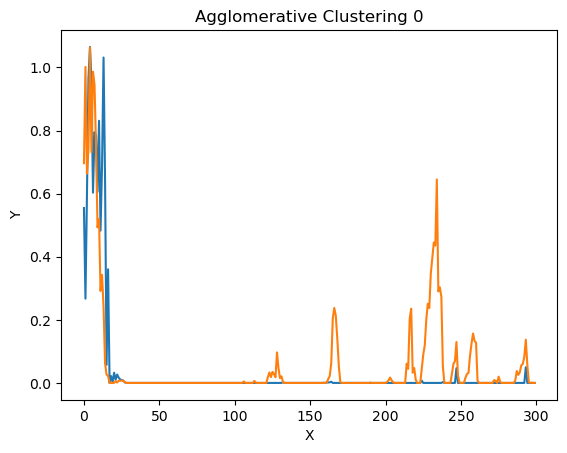

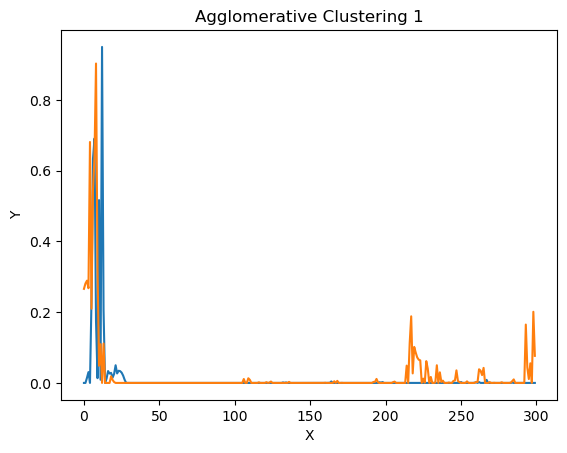

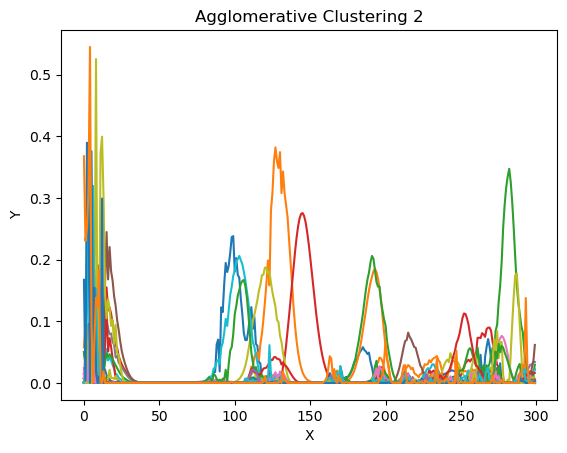

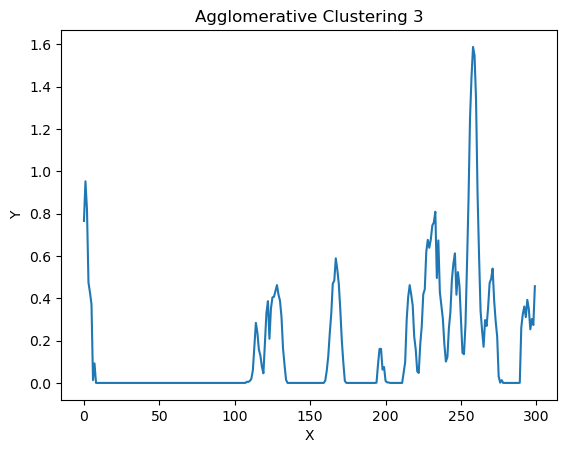

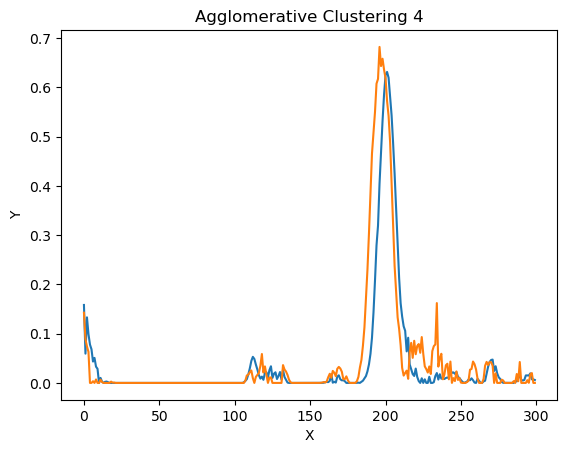

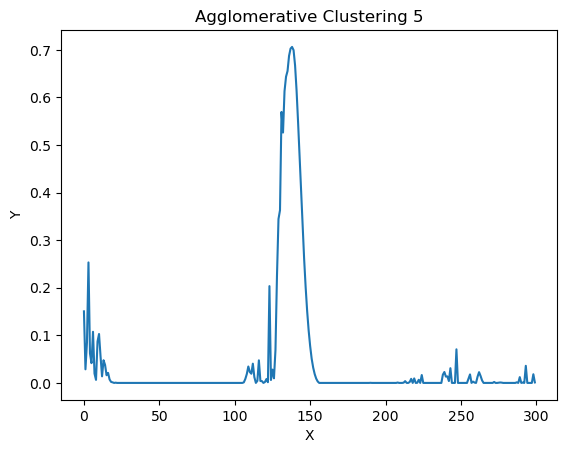

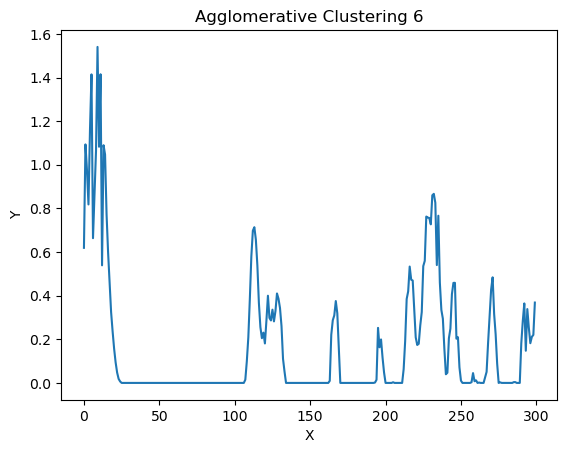

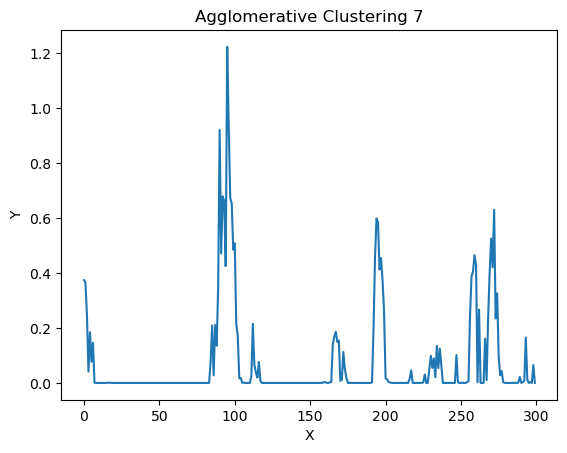

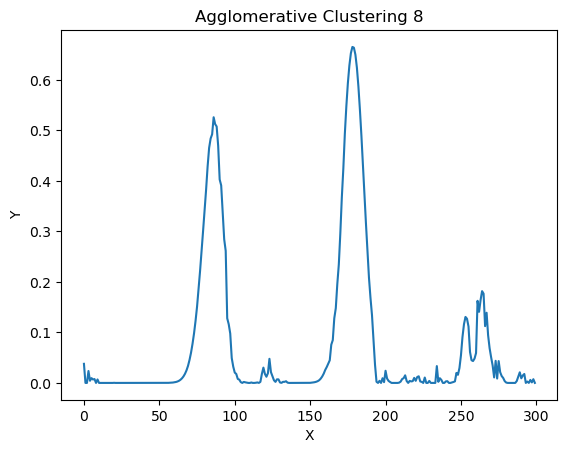

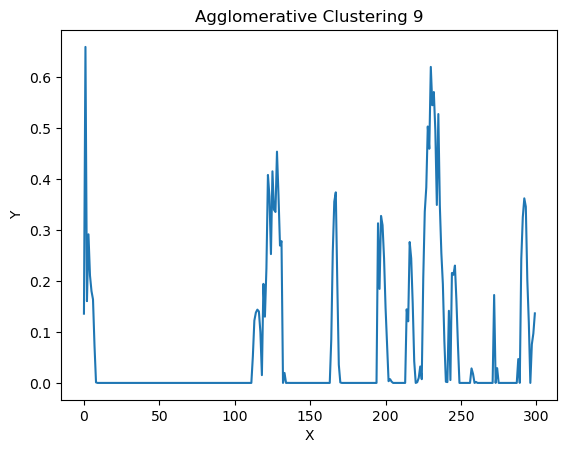

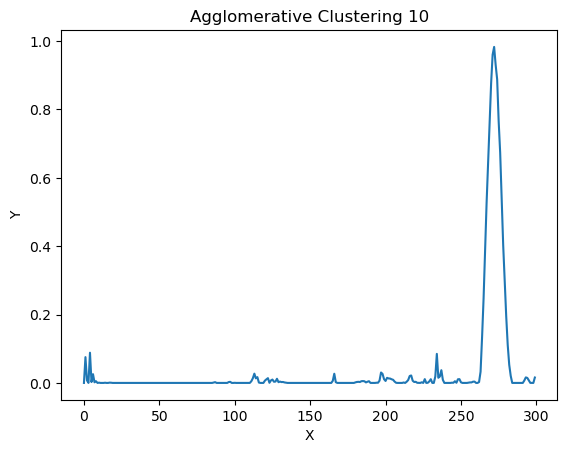

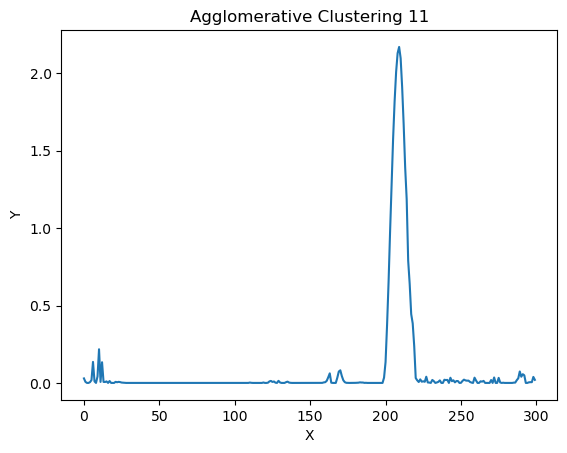

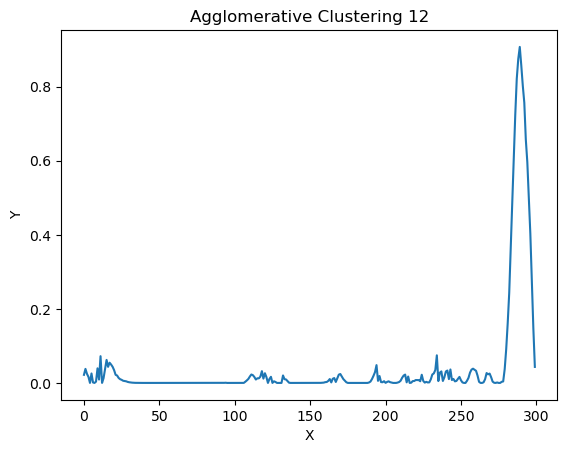

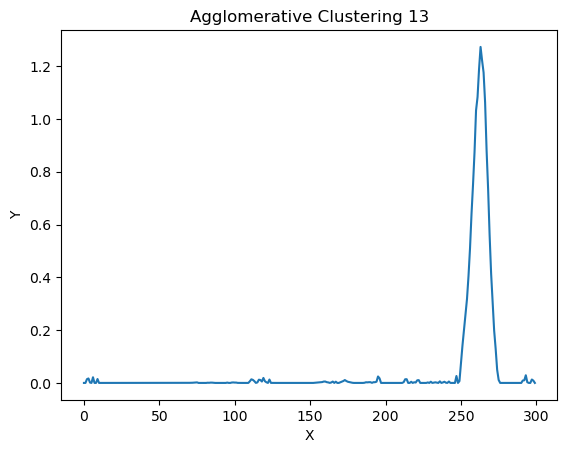

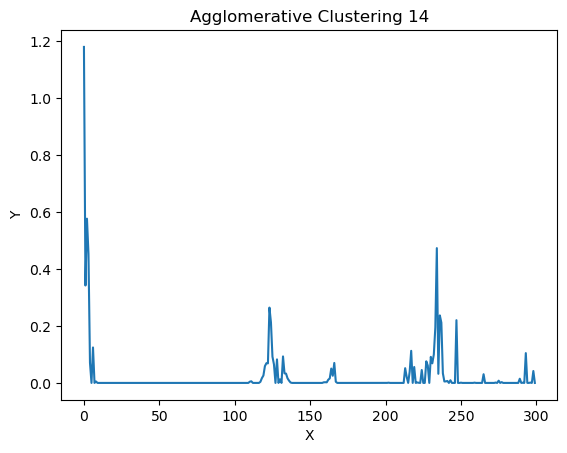

In [85]:
AggComponents = np.array(my_nmf_compos).T
AggClusters = AggCluster(15, AggComponents)

In [86]:
components_to_use = []
numb = np.array(AggClusters['Cluster_Number'])
clust_numb = np.where(numb == 3)
noc_1 = clust_numb[0]
#clust_numb2 = np.where(numb == 2)
#noc_2 = clust_numb2[0]
clust_numb3 = np.where(numb == 6)
noc_3 = clust_numb3[0]
#clust_numb4 = np.where(numb == 4)
#noc_4 = clust_numb4[0]
clust_numb5 = np.where(numb == 9)
noc_5 = clust_numb5[0]

for i in noc_1:
    components_to_use.append(AggClusters['Int_Angle'][i])
#for i in noc_2:
#    components_to_use.append(AggClusters['Int_Angle'][i])
for i in noc_3:
    components_to_use.append(AggClusters['Int_Angle'][i])
#for i in noc_4:
#    components_to_use.append(AggClusters['Int_Angle'][i])
for i in noc_5:
   components_to_use.append(AggClusters['Int_Angle'][i])

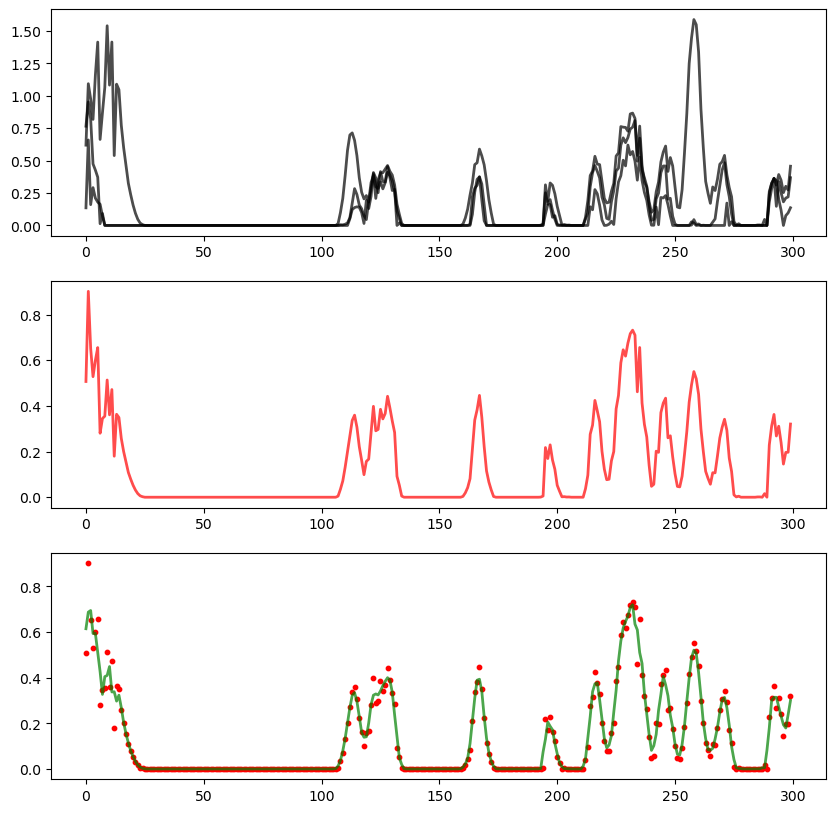

In [87]:
#Create a plot with all of the components in components_to_use and their mean on a separate plot in the same figure
components_to_use = np.array(components_to_use)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(components_to_use.T, c = 'k', linewidth = 2, alpha = 0.7)
ax2.plot(np.mean(components_to_use, axis = 0), c = 'r', linewidth = 2, alpha = 0.7)

#Use scipy signals to smooth the averaged components and plot the smoothed components over the meaned components
import scipy.signal as signal
smooth_components = signal.savgol_filter(np.mean(components_to_use, axis = 0), 3, 1)
ax3.plot(smooth_components, c = 'g', linewidth = 2, alpha = 0.7)
ax3.scatter(np.arange(len(np.mean(components_to_use, axis = 0))), np.mean(components_to_use, axis = 0), c = 'r', s = 10)

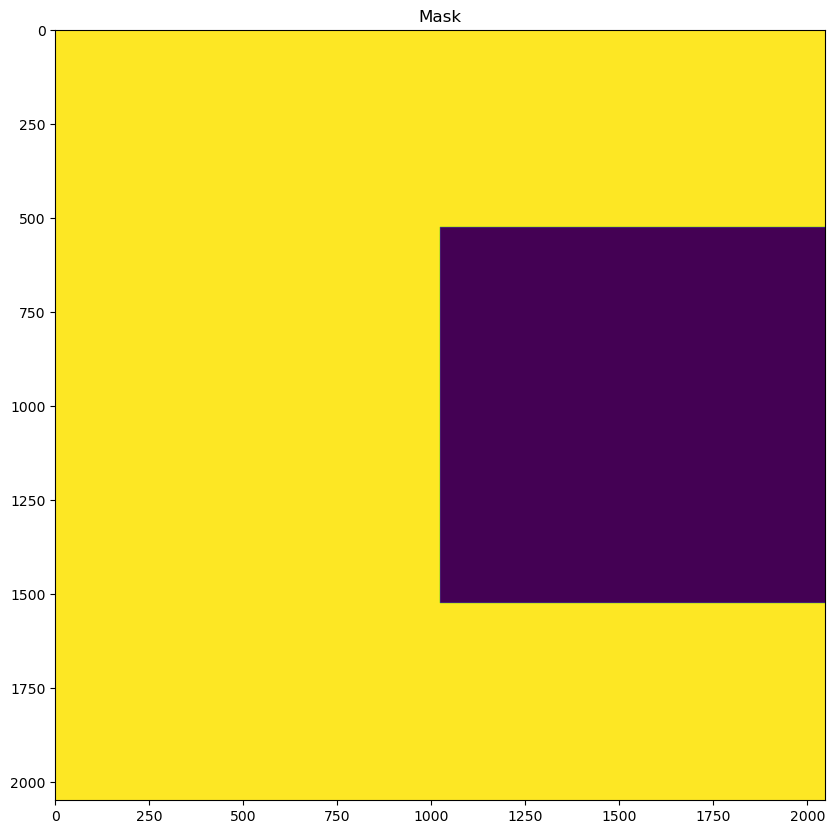

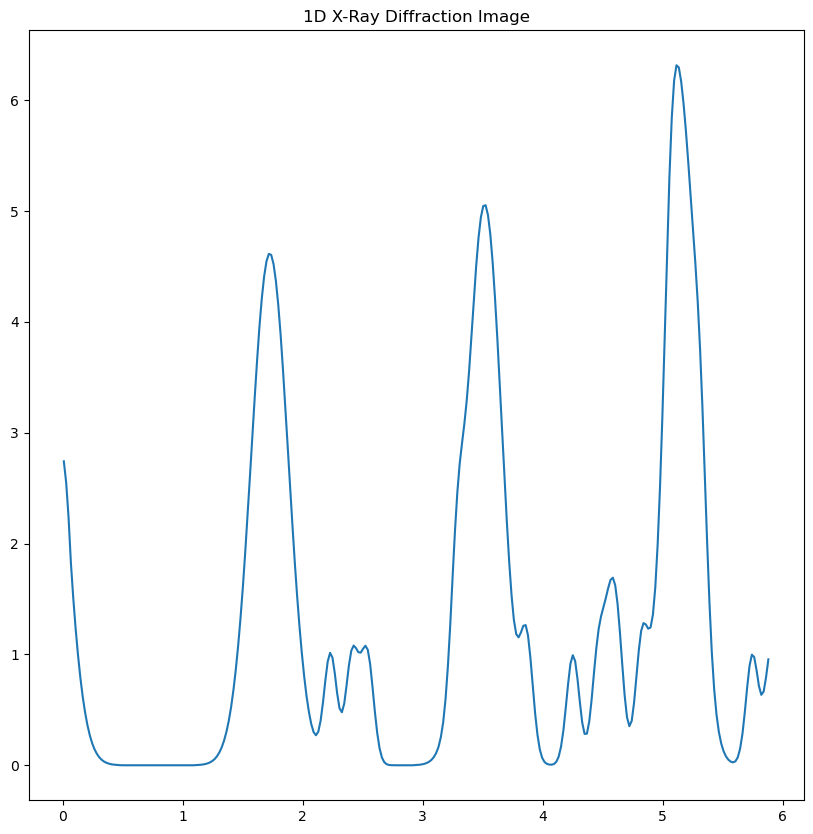

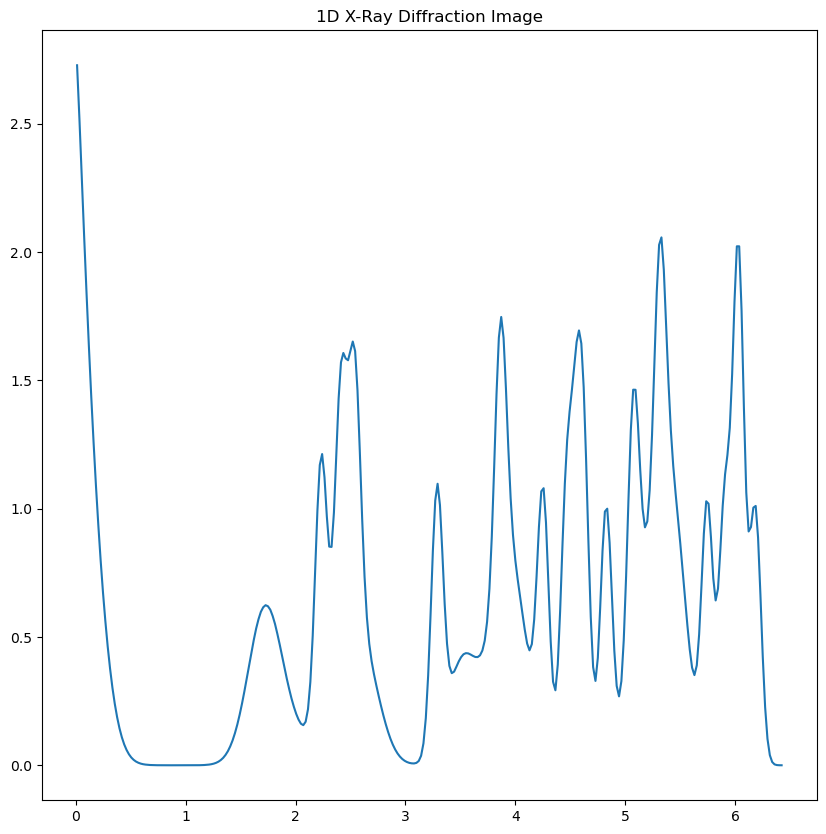

In [132]:
new_mask = tfdc.create_mask(thin_film, 500)
q, naive_int = tfdc.integrate_image(thin_film, .4, .5e-10, resolution = 300, show = True, mask = mask_data)
q, naive_int_avg = tfdc.integrate_image(thin_film, .4, .5e-10, resolution = 300, show = True, mask = new_mask)

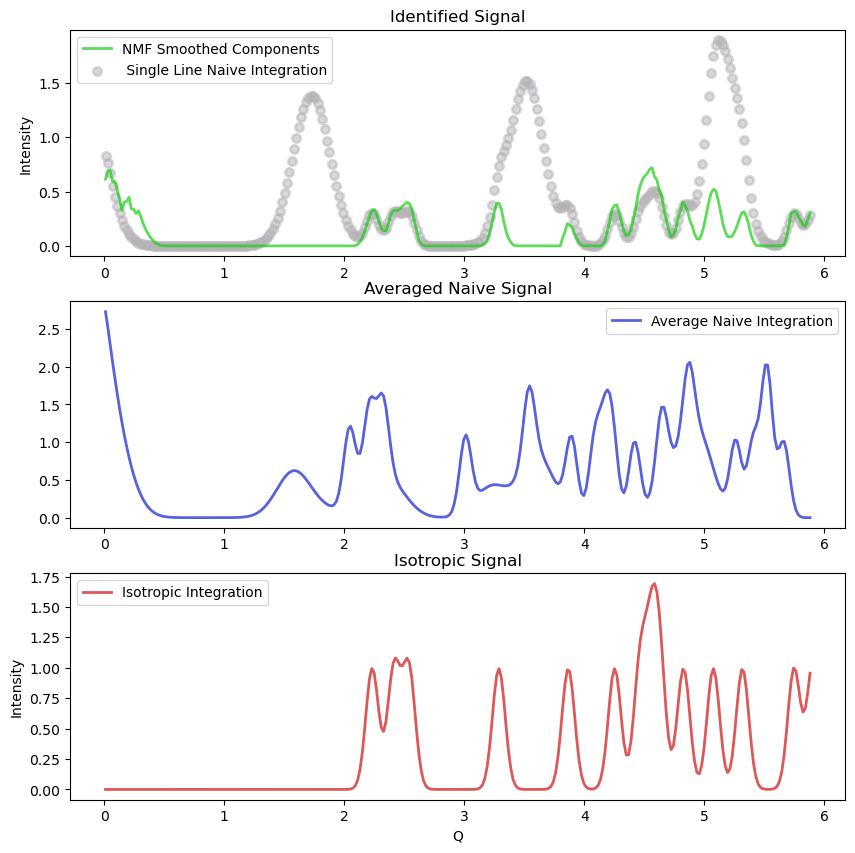

In [141]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(z,smooth_components, c = '#17cf11', linewidth = 2, alpha = 0.7, label = 'NMF Smoothed Components')
ax1.set_title('Identified Signal')
ax1.set_ylabel('Intensity')
ax1.scatter(z, naive_int*.3, c = '#b5b3b7', linewidth = 2, alpha = 0.5, label = ' Single Line Naive Integration')
ax2.plot(z,naive_int_avg, c = '#1120cf', linewidth = 2, alpha = 0.7, label = 'Average Naive Integration')
ax2.set_title('Averaged Naive Signal')
ax3.set_ylabel('Intensity')
ax3.plot(z,one_line, c = '#cf1111', linewidth = 2, alpha = 0.7, label = 'Isotropic Integration')
ax3.set_title('Isotropic Signal')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Q')
ax1.legend()
ax2.legend()
ax3.legend()

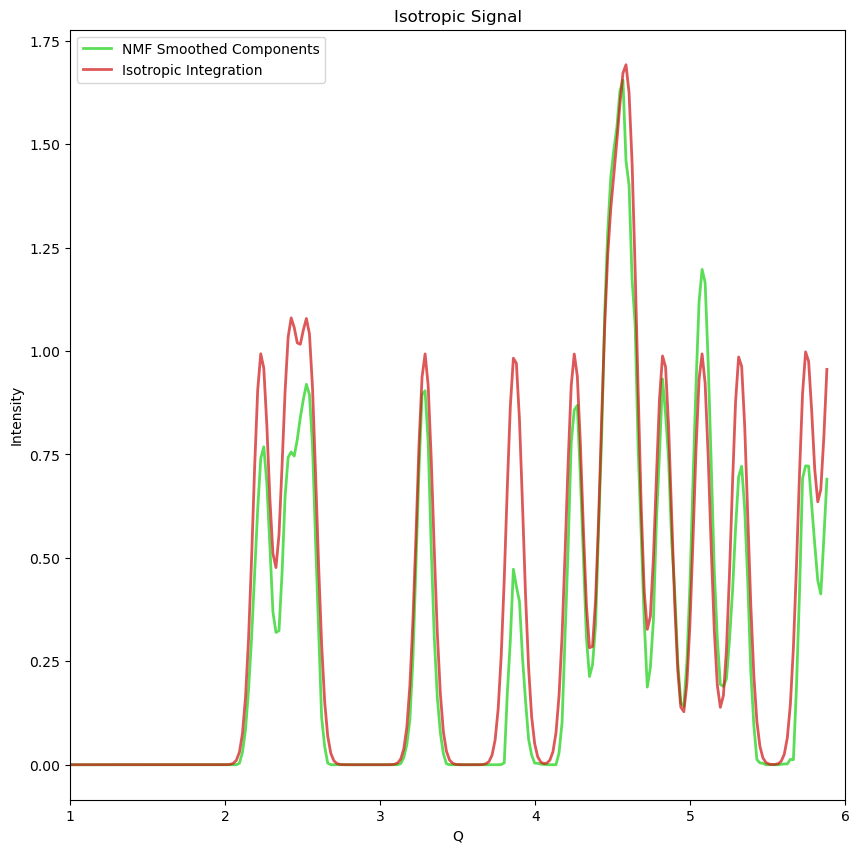

In [148]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10), sharex= True)
ax1.plot(z,smooth_components*2.3, c = '#17cf11', linewidth = 2, alpha = 0.7, label = 'NMF Smoothed Components')
ax1.set_title('Identified Signal')
ax1.set_ylabel('Intensity')
#ax1.plot(z, naive_int_avg*.3, c = '#1120cf', linewidth = 2, alpha = 0.5, label = ' Single Line Naive Integration')
#ax2.plot(z,naive_int_avg, c = '#1120cf', linewidth = 2, alpha = 0.7, label = 'Average Naive Integration')
#ax2.set_title('Naive Signal')
#ax2.set_ylabel('Intensity')
ax1.plot(z,one_line, c = '#cf1111', linewidth = 2, alpha = 0.7, label = 'Isotropic Integration')
ax1.set_title('Isotropic Signal')
ax1.set_ylabel('Intensity')
ax1.set_xlabel('Q')
ax1.legend()
ax1.set_xbound(1, 6)
#ax2.legend()
#ax3.legend()

In [150]:
import plotly.graph_objects as go

fig = go.Figure()

#plotting the NMF components and the Isotropic integration on the same plot using plotly

fig.add_trace(go.Scatter(x=z, y=smooth_components*2.3, mode='lines', name='NMF Smoothed Components', line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=z, y=one_line, mode='lines', name='Isotropic Integration', line=dict(color='red', width=2)))

fig.update_layout(title='Identified NMF Signal vs No-Substrate', xaxis_title='Q', yaxis_title='Intensity')

fig.update_xaxes(range=[1, 6])

fig.show()

In [153]:
fig = go.Figure()

#plotting the NMF components and the Isotropic integration on the same plot using plotly

fig.add_trace(go.Scatter(x=z, y=smooth_components*2.3, mode='lines', name='NMF Smoothed Components', line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=z, y=naive_int_avg, mode='lines', name='Isotropic Integration', line=dict(color='red', width=2, dash='dot')))

fig.update_layout(title='Identified NMF Signal vs No-Substrate', xaxis_title='Q', yaxis_title='Intensity')

fig.update_xaxes(range=[1, 6])

fig.show()

In [154]:
import plotly.subplots as sp

#creating two subplots with plotly where the fist plot is a scatter plot of the smoothed NMF components with the naive_int where the one line integration is dashed and grey
#the second plot is a scatter plot of just the identified isotropic signal (one line) that is in red

fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

fig.add_trace(go.Scatter(x=z, y=smooth_components*2.3, mode='lines', name='NMF Smoothed Components', line=dict(color='green', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=z, y=naive_int_avg, mode='lines', name='Isotropic Integration', line=dict(color='red', width=2, dash='dot')), row=1, col=1)
fig.add_trace(go.Scatter(x=z, y=one_line, mode='lines', name='Isotropic Integration', line=dict(color='red', width=2)), row=2, col=1)

INFO:distributed.core:Event loop was unresponsive in Nanny for 5.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 5.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

In [ ]:
#create a function that explores many different starting parameters for the NMF algorithm and returns the best one 
#based on the lowest beta-divergence that was found. The starting parameters that returns the best beta-divergence
#will be used for further analysis

def explore_nmf(data, num_trials):
        
        """A function that will take in the data and the number of trials that the user wants to run the NMF algorithm
        on. The function will then run the NMF algorithm on the data with different starting parameters and return the
        best starting parameters for the NMF algorithm based on the lowest beta-divergence that was found. The starting
        parameters that returns the best beta-divergence will be used for further analysis"""
        
        #create an empty list to store the beta-divergences in
        beta_divs = []
        
        #create an empty list to store the number of components in
        num_comps = []
        
        #create an empty list to store the starting parameters in
        start_params = []
        
        #create an empty list to store the final parameters in
        final_params = []
        
        #create an empty list to store the final components in
        final_comps = []
        
        #create an empty list to store the final data in
        final_data = []
        
        #create a for loop that will run the NMF algorithm on the data with different starting parameters
        for i in range(num_trials):
            
            #create a random starting parameter
            start_param = np.random.uniform(0, 1, size = (data.shape[0], 1))
            
            #run the NMF algorithm on the data with the random starting parameter
            comps, data = Run_NMF(data, start_param)
            
            #append the beta-divergence to the beta-divergences list
            beta_divs.append(Divergence)
            
            #append the number of components to the number of components list
            num_comps.append(number_of_components)
            
            #append the starting parameter to the starting parameters list
            start_params.append(start_param)
            
            #append the final parameters to the final parameters list
            final_params.append(In)
            
            #append the final components to the final components list
            final_comps.append(compos)
            
            #append the final data to the final data list
            final_data.append(NMF_Data_2)
            
        #create a dataframe that will store the beta-divergences, number of components, starting parameters, final parameters,
        #final components, and final data
        results = pd.DataFrame({'Beta_Divergence': beta_divs, 'Number_Components': num_comps, 'Starting_Parameters